Populating the interactive namespace from numpy and matplotlib


/home/vsp221/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[(3, 18), (4, 18), (5, 18), (6, 18), (7, 18), (8, 18), (9, 18), (10, 18), (11, 18), (12, 18), (13, 19), (14, 19), (15, 19), (16, 19), (17, 18)]
[(6.5, -8.5), (5.5, -8.5), (4.5, -8.5), (3.5, -8.5), (2.5, -8.5), (1.5, -8.5), (0.5, -8.5), (-0.5, -8.5), (-1.5, -8.5), (-2.5, -8.5), (-3.5, -9.5), (-4.5, -9.5), (-5.5, -9.5), (-6.5, -9.5), (-7.5, -8.5)]
operations: 35 path length: 15
+--------------------+
|                    |
|                    |
|          ##        |
|          ##   #### |
|#####     ##        |
|       ##           |
|       ##           |
|           ## ##    |
|     # ##  ## ##    |
|     ####           |
|     ### ##### ##   |
|     ##  ##### ##   |
|         #####      |
|                    |
|      ##            |
|      ##       ###  |
|             #####  |
|  #          ####   |
|   sxxxxxxxxx##  e  |
|             xxxx   |
+--------------------+


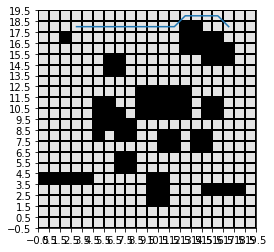

In [8]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
%pylab inline
n, m = 20,20  # number of rows and columns respectively.
# to convert to coppeliasim, the origin of the graph needs to be moved up and over 10 by 10
# Create a matrix to represent the cells of the grid
grid_cells = np.zeros((n,m))

# Plot the grid
def draw_grid():
    fig, ax = plt.subplots()
    cmap = matplotlib.colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid_cells, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-0.5, m, 1));
    ax.set_yticks(np.arange(-0.5, n, 1));


#leftmost block
grid_cells[4][0] = 1;
grid_cells[4][1] = 1;
grid_cells[4][2] = 1;
grid_cells[4][3] = 1;
grid_cells[4][4] = 1;
#Dot at top
grid_cells[17][2] = 1;
#Other dot at top
grid_cells[14][6] = 1;
grid_cells[14][7] = 1;
grid_cells[15][6] = 1;
grid_cells[15][7] = 1;
#dot near diagonal
grid_cells[8][5] = 1;
grid_cells[9][5] = 1;
#medium dot
grid_cells[5][7] = 1;
grid_cells[6][7] = 1;
grid_cells[5][8] = 1;
grid_cells[6][8] = 1;
#other middle dot
grid_cells[8][11] = 1;
grid_cells[8][12] = 1;
grid_cells[7][11] = 1;
grid_cells[7][12] = 1;
#second leftmost
grid_cells[7][15] = 1;
grid_cells[8][15] = 1;
grid_cells[7][14] = 1;
grid_cells[8][14] = 1;
#leftmost
grid_cells[11][16] = 1;
grid_cells[11][15] = 1;
grid_cells[10][16] = 1;
grid_cells[10][15] = 1;
#bottommost
grid_cells[2][10] = 1;
grid_cells[3][10] = 1;
grid_cells[4][10] = 1;
grid_cells[2][11] = 1;
grid_cells[3][11] = 1;
grid_cells[4][11] = 1;
#rightmost brick
grid_cells[3][15] = 1;
grid_cells[3][16] = 1;
grid_cells[3][17] = 1;
grid_cells[3][18] = 1;
#middle brick
grid_cells[10][9] = 1;
grid_cells[10][10] = 1;
grid_cells[10][11] = 1;
grid_cells[10][12] = 1;
grid_cells[10][13] = 1;
grid_cells[11][9] = 1;
grid_cells[11][10] = 1;
grid_cells[11][11] = 1;
grid_cells[11][12] = 1;
grid_cells[11][13] = 1;
grid_cells[12][9] = 1;
grid_cells[12][10] = 1;
grid_cells[12][11] = 1;
grid_cells[12][12] = 1;
grid_cells[12][13] = 1;
#middle diagonal
grid_cells[11][5] = 1;
grid_cells[11][6] = 1;
grid_cells[10][5] = 1;
grid_cells[10][6] = 1;
grid_cells[9][6] = 1;
grid_cells[10][7] = 1;
grid_cells[9][7] = 1;
grid_cells[8][7] = 1;
grid_cells[9][8] = 1;
grid_cells[8][8] = 1;
#top right diagonal
grid_cells[18][13] = 1;
grid_cells[18][14] = 1;
grid_cells[17][13] = 1;
grid_cells[17][14] = 1;
grid_cells[17][15] = 1;
grid_cells[17][16] = 1;
grid_cells[16][13] = 1;
grid_cells[16][14] = 1;
grid_cells[16][15] = 1;
grid_cells[16][16] = 1;
grid_cells[16][17] = 1;
grid_cells[15][15] = 1;
grid_cells[15][16] = 1;
grid_cells[15][17] = 1;
draw_grid()
grid_n = np.zeros((n,m))

for x in range(0,20):
    for y in range(0,20):
        if grid_cells[x][y] == 0:
            grid_n[x][y] = 1
        else:
            grid_n[x][y] = 0
            

grid = Grid(matrix=grid_n)

start = grid.node(3, 1)
end = grid.node(17, 18)

finder = AStarFinder(diagonal_movement=DiagonalMovement.always)
path, runs = finder.find_path(start, end, grid)

print(path)
#Convert to coppeliasim points here
#1,3 -> 7.6,8.5
c_path = [];
for coord in path:
    x = 9.5-coord[0]
    y = 9.5-coord[1]
    c_path.append((x,y))
    
print(c_path)

print('operations:', runs, 'path length:', len(path))
print(grid.grid_str(path=path, start=start, end=end))

##Making it pretty
pathp = []
for nodelet in path:
    pathp.append([nodelet[1], nodelet[0]])
#draw_grid()
printp = np.array(pathp)
plt.plot(printp[:,0], printp[:,1])
plt.show()
